### Project: Investigating the Medical Appointment Dataset¶

#### Table of Contents

Introduction Data Wrangling Exploratory Data Analysis Conclusions

Introduction The medical appointment dataset contains information on over 100k appointments from the country of Brazil. The dataset was originally sourced from Kaggle. It was created to study what factors were useful in predicting if patients would miss thier appointments. It contains basic demographic information on the patients as well as whether or not the patient received SMS notifications. In addition, it indicates if the patient received financial aid.

### Research questions:

Is age indicative of whether a patient will make their appointments? Do SMS notifications coincide with fewer no shows? Do some days of the week have more no shows than others? ‘ScheduledDay’ tells us on what day the patient set up their appointment.

**Neighborhood indicates the location of the hospital.**

**Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.**

**No-show’ says ‘No’ if the patient showed up to their appointment, and Yes if they did not show up.**

In [1]:
# Import statements for all of the packages that I am going to use
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling




### General Properties
 *The Pandas library will be used to work with the data. The following commands will low that dataset into a pandas dataframe     and display basic information about it.*

#### Importing the Data
 *Extracting the data stored as rows and columns into a DataFrame*

In [2]:
# Load data to a dataframe and visualize the first lines

df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Get information about the ndim of the dataframe
df.ndim

2

In [4]:
# Get information about the shape of the dataframe
df.shape

(110527, 14)

In [5]:
# Get information about the size of the dataframe
df.size

1547378

**Step 1**: Check the column names to see if we have to rename them:



In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=110527, step=1)

In [8]:
df.values

array([[29872499824296.0, 5642903, 'F', ..., 0, 0, 'No'],
       [558997776694438.0, 5642503, 'M', ..., 0, 0, 'No'],
       [4262962299951.0, 5642549, 'F', ..., 0, 0, 'No'],
       ...,
       [15576631729893.0, 5630692, 'F', ..., 0, 1, 'No'],
       [92134931435557.0, 5630323, 'F', ..., 0, 1, 'No'],
       [377511518121127.0, 5629448, 'F', ..., 0, 1, 'No']], dtype=object)

In [9]:
df.describe() 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


###### the mean of age is 37 and max is 115 ,min -1
#### and there's a wrong here because noone has -1 years so to make your dataset is more accutare delete or replace cell with mean ages

**Step 2**: Get information about the variables in the dataframe and make changes if necessary


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**The ouput shows that there are 110,527 entries described by 14 fields. There are also no null fields. The following command will display the first five rows to allow for a closer look**

convert column ScheduledDay from to object to to_datetime

In [11]:
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  object             
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

### create a new columns from ScheduledDay {year_month_day}

In [12]:
df["Year"]=df["ScheduledDay"].dt.year
df["Month"]=df["ScheduledDay"].dt.month
df["Day"]=df["ScheduledDay"].dt.day_name()
df["Hour"]=df["ScheduledDay"].dt.hour

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Year,Month,Day,Hour
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,Friday,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,Friday,16
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,Friday,16
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,Friday,17
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,Friday,16


### Data Cleaning

#### **Drop extraneous columns**

 

**Step 1**: Check the column names to see if we have to rename them:


In [13]:
df=df.rename(columns={"No-show":"No_show"})
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Year,Month,Day,Hour
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,Friday,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,Friday,16
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,Friday,16
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,Friday,17
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,Friday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016,5,Tuesday,9
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016,5,Tuesday,7
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016,4,Wednesday,16
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016,4,Wednesday,15


In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# extract your data that you need and to be more easy when working on it so we delete some columns probably not useful for us 
df.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay"],axis=1,inplace=True)
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Year,Month,Day,Hour
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,Friday,18
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,Friday,16
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,Friday,16
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,Friday,17
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,Friday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016,5,Tuesday,9
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016,5,Tuesday,7
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016,4,Wednesday,16
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016,4,Wednesday,15


### convert no show data to 0 and 1 instead of 'yes' and 'no' so we can handle using plot or goupby


In [15]:
show=df[df["No_show"]=="No"]
No_show=df[df["No_show"]=="Yes"]


In [16]:
show

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Year,Month,Day,Hour
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,Friday,18
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,Friday,16
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,Friday,16
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,Friday,17
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,Friday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016,5,Tuesday,9
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016,5,Tuesday,7
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016,4,Wednesday,16
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016,4,Wednesday,15


### Exploratory Data Analysis

##### **Research Question 1 (what is the overall appointment show-up vs. no show-up rate?)**

  ##### making a pie chart to have the percentage of who showed up and who is not

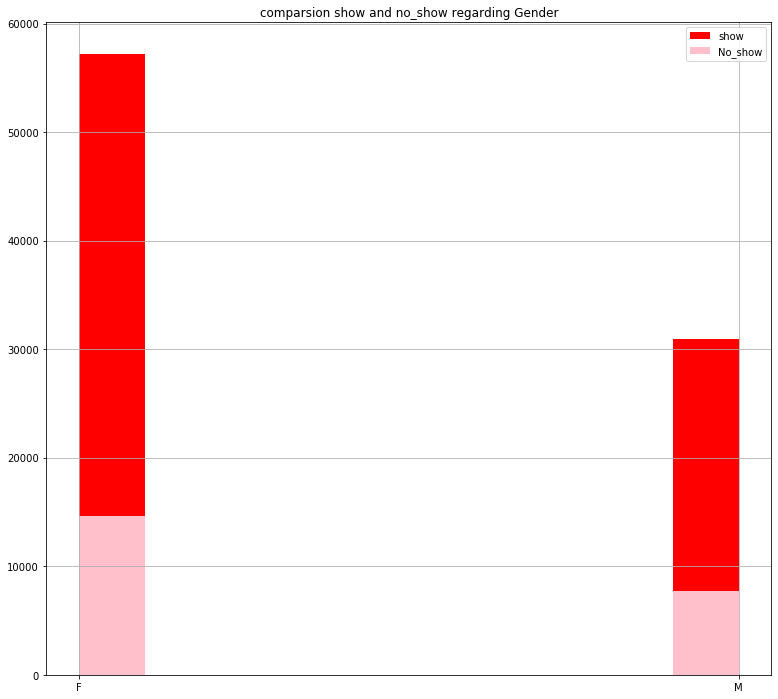

In [17]:
plt.figure(figsize=[13,12])
plt.hist(show["Gender"],label=["show"],color="red")
plt.hist(No_show["Gender"],label=["No_show"],color="Pink")
plt.legend()
plt.title("comparsion show and no_show regarding Gender")
plt.grid(True)
plt.style.use("_classic_test_patch")

 ##### making an Bar  to see the realtion between the (age,alcoholic people, SMS recievers, Gender, Scholarship) and the people who came to thier appointment¶


In [18]:
No_show["Gender"].value_counts()
show["Gender"].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

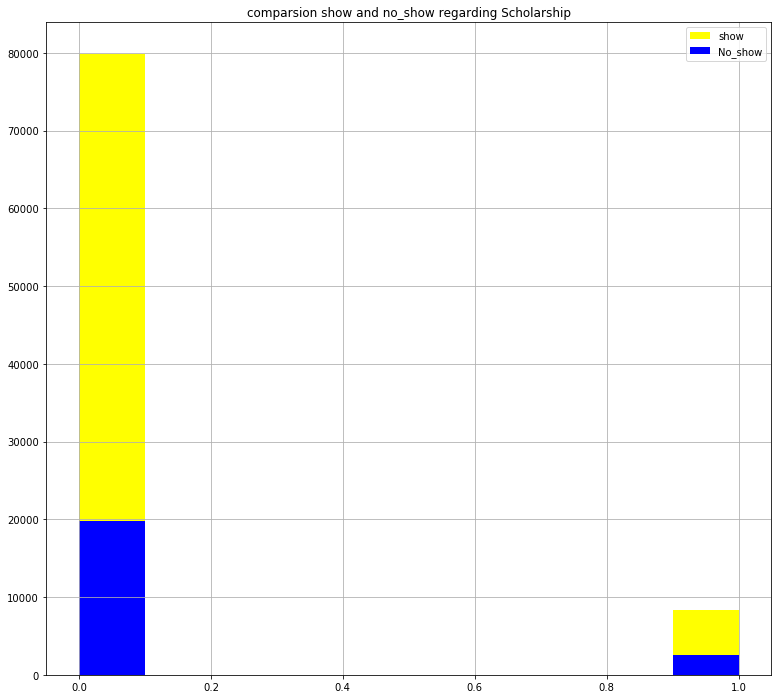

In [19]:
plt.figure(figsize=[13,12])
plt.hist(show["Scholarship"],label=["show"],color="yellow")
plt.hist(No_show["Scholarship"],label=["No_show"],color="blue")
plt.legend()
plt.title("comparsion show and no_show regarding Scholarship")
plt.grid(True)
plt.style.use("_classic_test_patch")

In [20]:
No_show["Scholarship"].value_counts()
show["Scholarship"].value_counts()

0    79925
1     8283
Name: Scholarship, dtype: int64

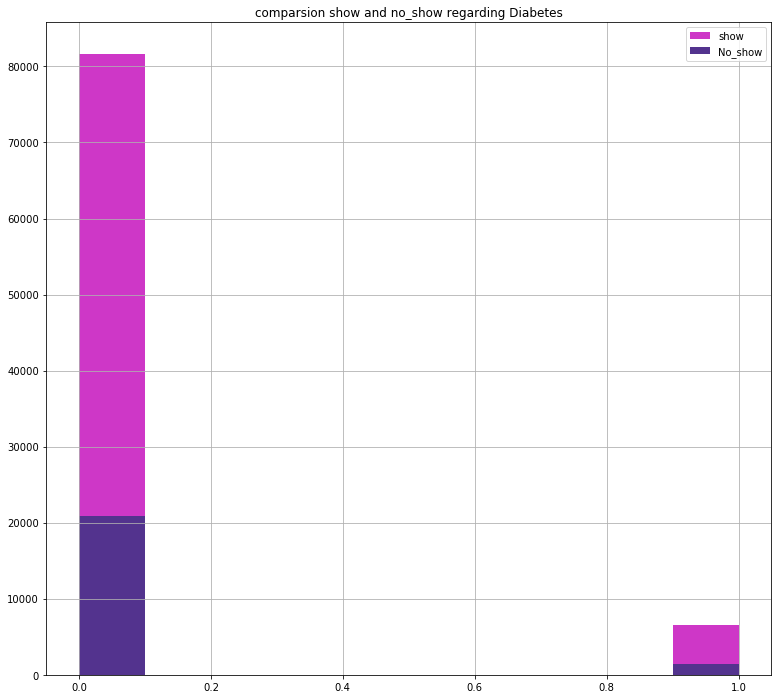

In [21]:
plt.figure(figsize=[13,12])
plt.hist(show["Diabetes"],label=["show"],color="#CE37C7")
plt.hist(No_show["Diabetes"],label=["No_show"],color="#53338E")
plt.legend()
plt.title("comparsion show and no_show regarding Diabetes")
plt.grid(True)
plt.style.use("seaborn-muted")

In [22]:
No_show["Diabetes"].value_counts()
show["Diabetes"].value_counts()

0    81695
1     6513
Name: Diabetes, dtype: int64

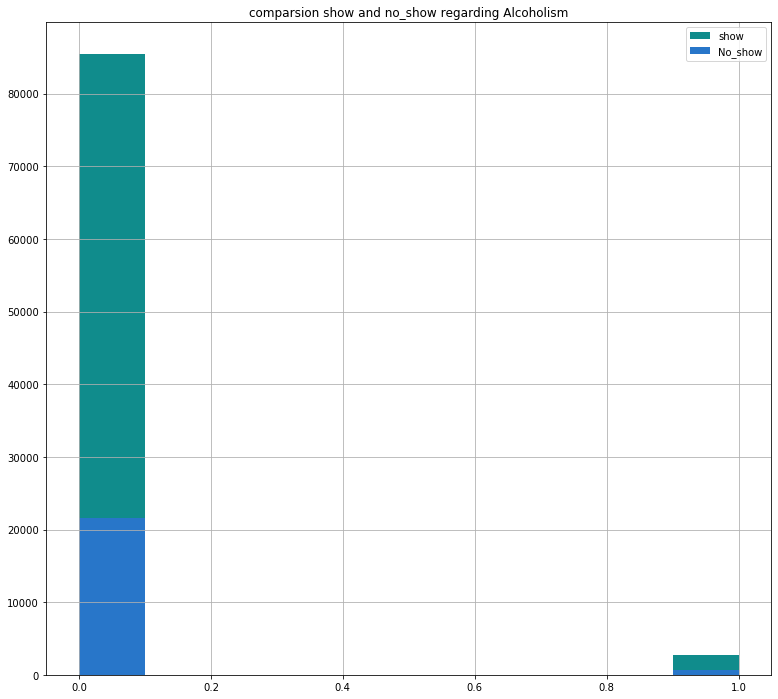

In [23]:
plt.figure(figsize=[13,12])
plt.hist(show["Alcoholism"],label=["show"],color="#108C8C")
plt.hist(No_show["Alcoholism"],label=["No_show"],color="#2876C9")
plt.legend()
plt.title("comparsion show and no_show regarding Alcoholism")
plt.grid(True)
plt.style.use("seaborn-talk")

In [24]:
No_show["Alcoholism"].value_counts()
show["Alcoholism"].value_counts()

0    85525
1     2683
Name: Alcoholism, dtype: int64

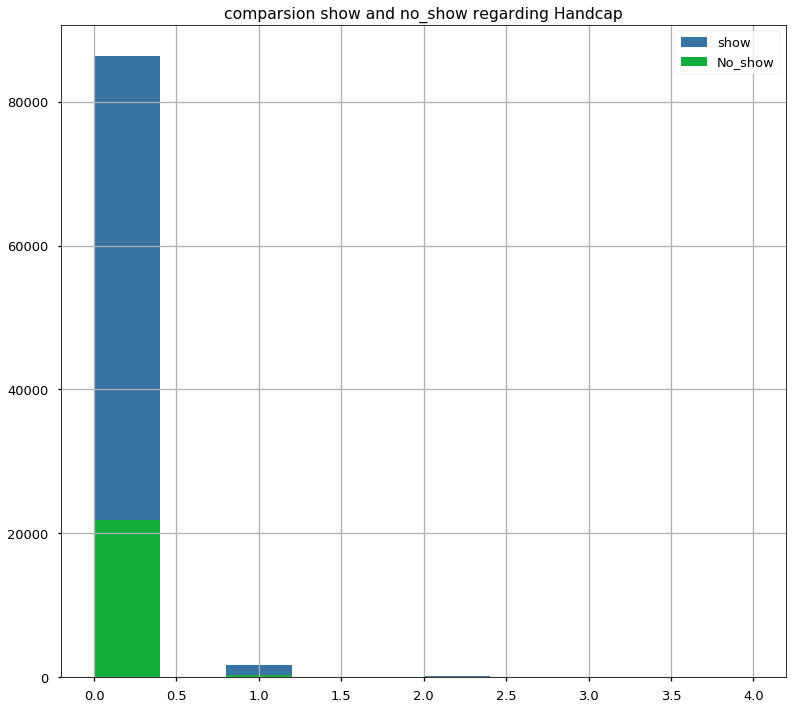

In [25]:
plt.figure(figsize=[13,12])
plt.hist(show["Handcap"],label=["show"],color="#3874A4")
plt.hist(No_show["Handcap"],label=["No_show"],color="#13AD3E")
plt.legend()
plt.title("comparsion show and no_show regarding Handcap")
plt.grid(True)
plt.style.use("tableau-colorblind10")

In [26]:
No_show["Handcap"].value_counts()
show["Handcap"].value_counts()

0    86374
1     1676
2      146
3       10
4        2
Name: Handcap, dtype: int64

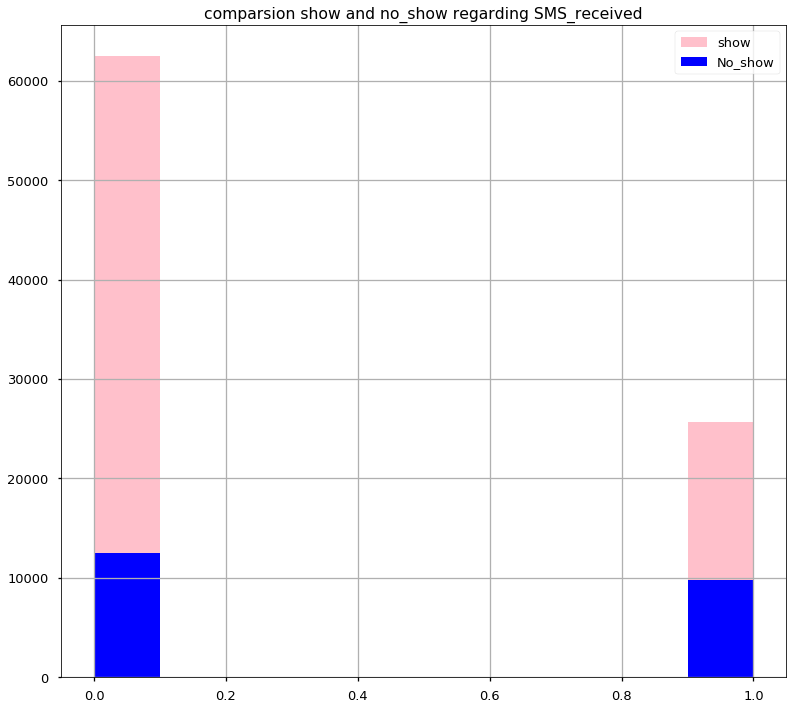

In [27]:
plt.figure(figsize=[13,12])
plt.hist(show["SMS_received"],label=["show"],color="pink")
plt.hist(No_show["SMS_received"],label=["No_show"],color="blue")
plt.legend()
plt.title("comparsion show and no_show regarding SMS_received")
plt.grid(True)
plt.style.use("Solarize_Light2")

In [28]:
No_show["SMS_received"].value_counts()
show["SMS_received"].value_counts()

0    62510
1    25698
Name: SMS_received, dtype: int64

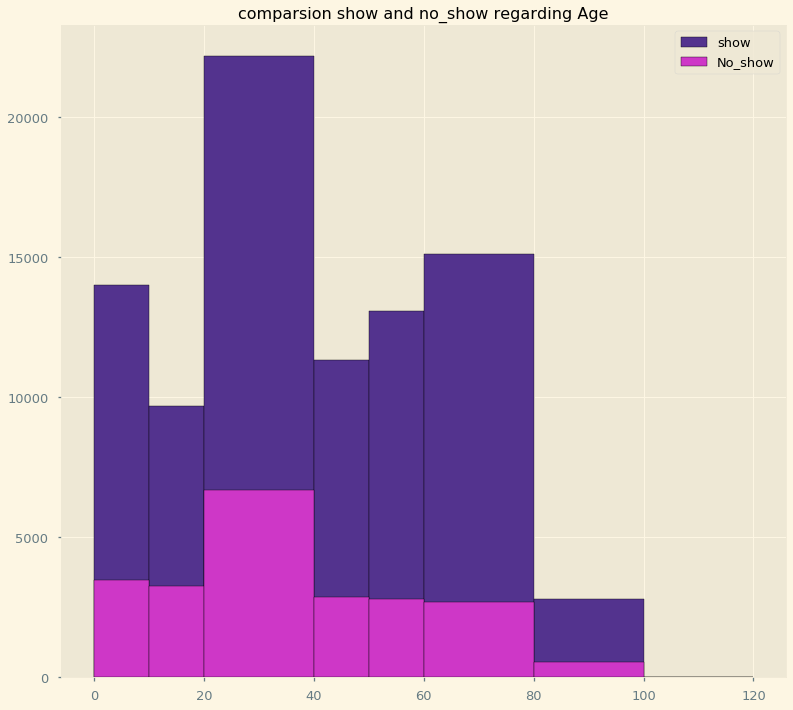

In [29]:
plt.figure(figsize=[13,12])
plt.hist(show["Age"],bins=[0,10,20,40,50,60,80,100,120],edgecolor="black",label=["show"],color="#53338E")
plt.hist(No_show["Age"],bins=[0,10,20,40,50,60,80,100,120],edgecolor="black",label=["No_show"],color="#CE37C7")
plt.legend()
plt.title("comparsion show and no_show regarding Age")
plt.grid(True)
plt.style.use("Solarize_Light2")

In [30]:
No_show["Age"].value_counts()
show["Age"].value_counts()

 0      2900
 1      1858
 52     1449
 56     1372
 2      1366
        ... 
 100       4
 102       2
 115       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

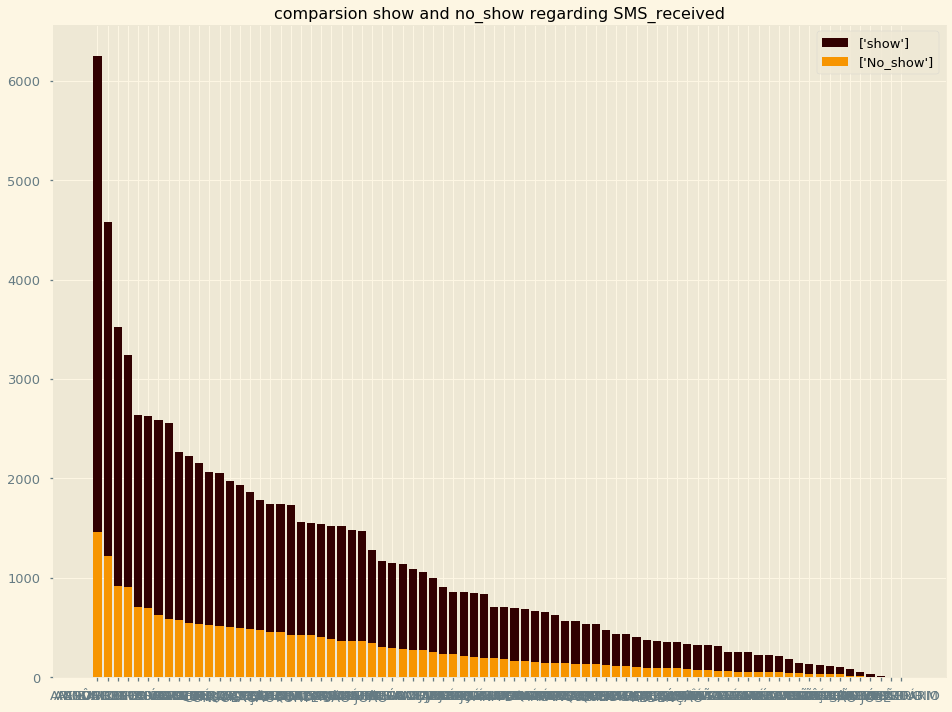

In [31]:
x=np.unique(show["Neighbourhood"])

plt.figure(figsize=[16,12])
plt.bar(x,show["Neighbourhood"].value_counts(),label=["show"],color="#310000")
plt.bar(x,No_show["Neighbourhood"].value_counts(),label=["No_show"],color="#F79500")
plt.legend()
plt.title("comparsion show and no_show regarding SMS_received")
plt.grid(True)
plt.style.use("fivethirtyeight")
plt.show()

In [32]:
No_show["Neighbourhood"].value_counts()
show["Neighbourhood"].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64


### Conclusions

#### Based on above analysis we gain following insight
**General trend is that around 80% patients attend appointment.

**A trend related to age could be observerd where people with lower age less than 35 tend to miss apointment more then the people with age greater than 35

**Medical Scheme has very little imaact on the trend

**Diseased Patients tend to attend appointment approximately 84% times

**Sending SMS has a worse imapct on people as the general trends shows that people who get sms are less likely to attend appointment as compared to those who dosent

### Limitations

**The different categories (Columns) Provided in this data set do not provide sufficent information to derive the exact reason behind the behaviour of the patients towards attending or missing the appointment.**

**We observe a anamolous behviour when we study the patients who recieve SMS miss their appointment often. Now we cannot get to the exact**

**Similarly along with the location of neighbouthood of the hospitals if information like rural,Urban area was provided it could have made it more easier to understand**

**Here very selected deseases are mentioned in the data which should have been more elaborated and common disease like flu etc should be menitoned that would have helped us get the deeper insight to understand the trends and patterns welll**

### **Submitting your Project**
 **Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).**

 **Alternatively, you can download this report as .html via the File > Download as submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.**

**Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!**

In [33]:

from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])


4294967295